In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# 读入 DAU（每天至少来访1次的用户）数据
DAU_table = pd.read_csv('./data/section4-dau.csv')
DAU_table.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [4]:
# 读入 user_info（每天至少消费1日元的用户）数据
user_info_table = pd.read_csv('./data/section4-user_info.csv')
user_info_table.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [9]:
# 合并 DAU 和 user_info
merge_table = pd.merge(DAU_table,user_info_table,how='left',left_on='user_id',right_on='user_id',sort=True)
merge_table = merge_table.rename(columns = {'app_name_x': 'app_name'})
merge_table =merge_table[['user_id','app_name','log_date','install_date','gender','generation','device_type']]
merge_table.head()

,user_id,app_name,log_date,install_date,gender,generation,device_type
0,1,game-01,2013-09-01,2013-04-15,M,40,iOS
1,1,game-01,2013-09-02,2013-04-15,M,40,iOS
2,1,game-01,2013-09-03,2013-04-15,M,40,iOS
3,1,game-01,2013-09-04,2013-04-15,M,40,iOS
4,1,game-01,2013-09-05,2013-04-15,M,40,iOS


In [11]:
# 用户群透视（性别）
merge_table['访问月份'] = merge_table['log_date'].map(lambda x: x.split('-')[0] + '年' + x.split('-')[1].split('-')[0] + '月')

pivot_gender = pd.pivot_table(merge_table,index=['访问月份'],values=['user_id'],columns=['gender'],aggfunc='count')
pivot_gender

user_id       
gender         F      M
访问月份                   
2013年08月   47343  46842
2013年09月   38027  38148

In [12]:
# 用户群透视（年龄段）
pivot_generation = pd.pivot_table(merge_table,index=['访问月份'],values=['user_id'],columns=['generation'],aggfunc='count')
pivot_generation

user_id                          
generation      10     20     30    40    50
访问月份                                        
2013年08月     18785  33671  28072  8828  4829
2013年09月     15391  27229  22226  7494  3835

In [13]:
# 用户群透视（性别 + 年龄段）
pivot_gender_generation = pd.pivot_table(merge_table,index=['访问月份'],values=['user_id'],columns=['gender','generation'],aggfunc='count')
pivot_gender_generation

user_id                                                          
gender           F                               M                          
generation      10     20     30    40    50    10     20     30    40    50
访问月份                                                                        
2013年08月      9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
2013年09月      7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

In [14]:
# 用户群透视（设备）
pivot_device_type = pd.pivot_table(merge_table,index=['访问月份'],values=['user_id'],columns=['device_type'],aggfunc='count')
pivot_device_type

user_id       
device_type Android    iOS
访问月份                      
2013年08月      46974  47211
2013年09月      29647  46528

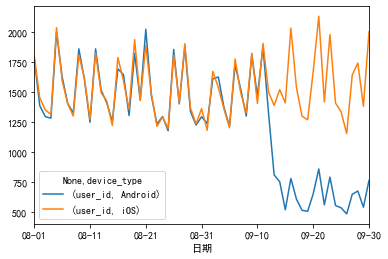

In [21]:
# 结果可视化
merge_table['日期'] = merge_table['log_date'].map(lambda x: x.replace('2013-',''))
df = pd.pivot_table(merge_table,index=['日期'],values=['user_id'],columns=['device_type'],aggfunc='count')

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

df.plot(kind='line')